
# Assignment No 4e
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of Conic weak learner based Random Forest.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

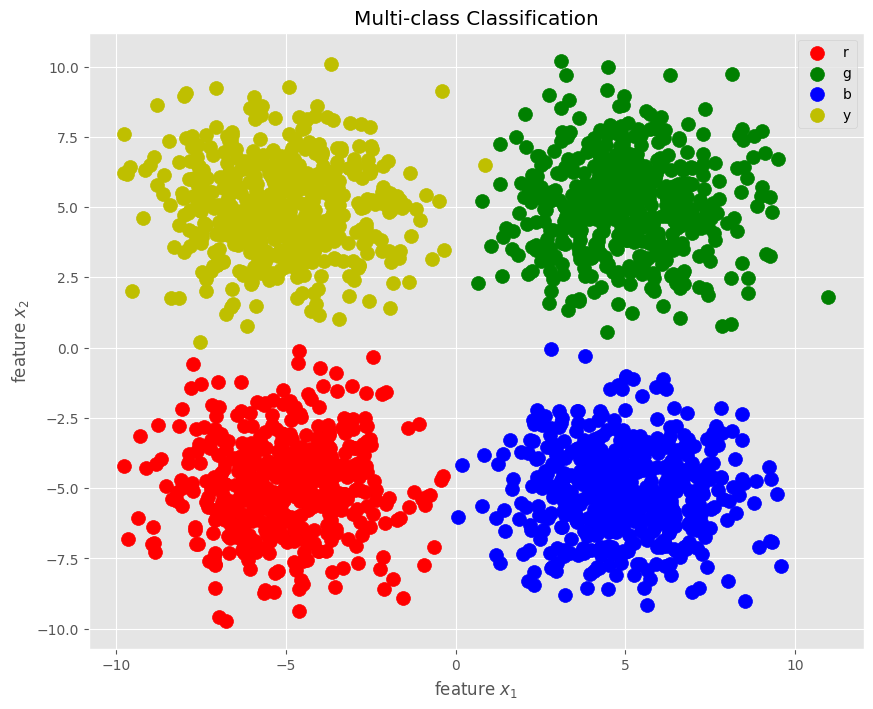

In [42]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples//4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples//4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))


In [53]:
import randomForest as rf

In [54]:
rfc=rf.RandomForest(weaklearner='Conic')

In [55]:
print( X.shape, Y.shape)

(2000, 2) (2000, 1)


In [56]:
%pdb off 
rfc.train(X,Y)

Automatic pdb calling has been turned OFF


In [57]:
len(rfc.trees)

10

In [58]:
X.shape

(2000, 2)

In [59]:
%pdb off 
# Training Confusion Matrix...
Yp=rfc.predict(X)
print(Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        500    0    0    0   500
2.0          0  500    0    0   500
3.0          1    0  499    0   500
4.0          0    1    0  499   500
All        501  501  499  499  2000

In [60]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


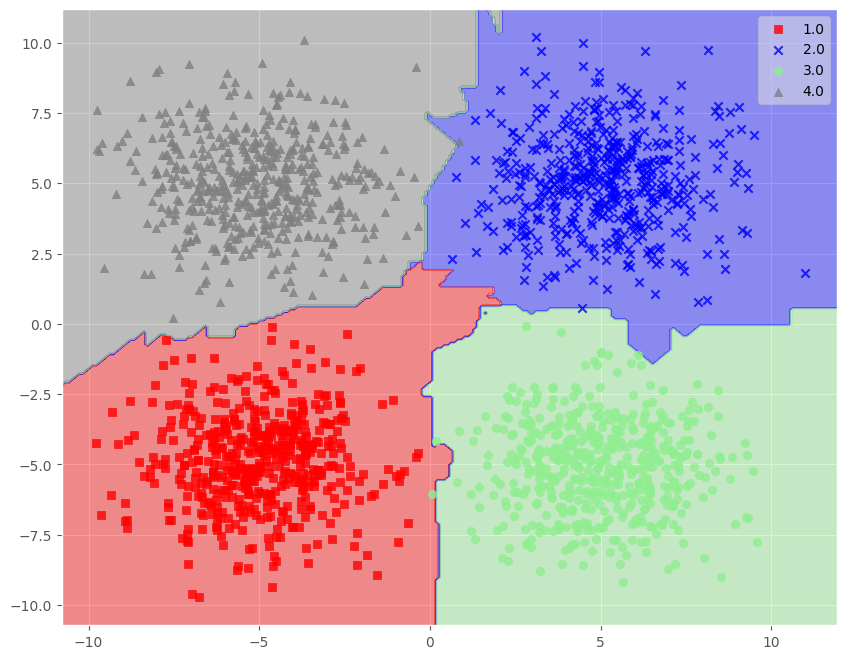

In [61]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

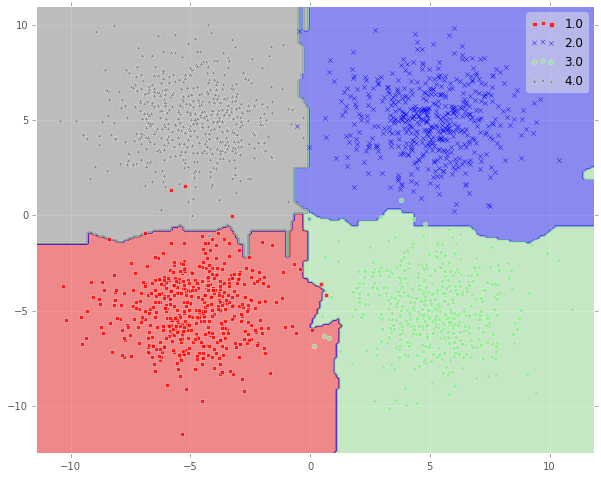

In [12]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [62]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        249    0    1    0   250
2.0          0  247    1    2   250
3.0          1    1  248    0   250
4.0          2    0    0  248   250
All        252  248  250  250  1000

In [63]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


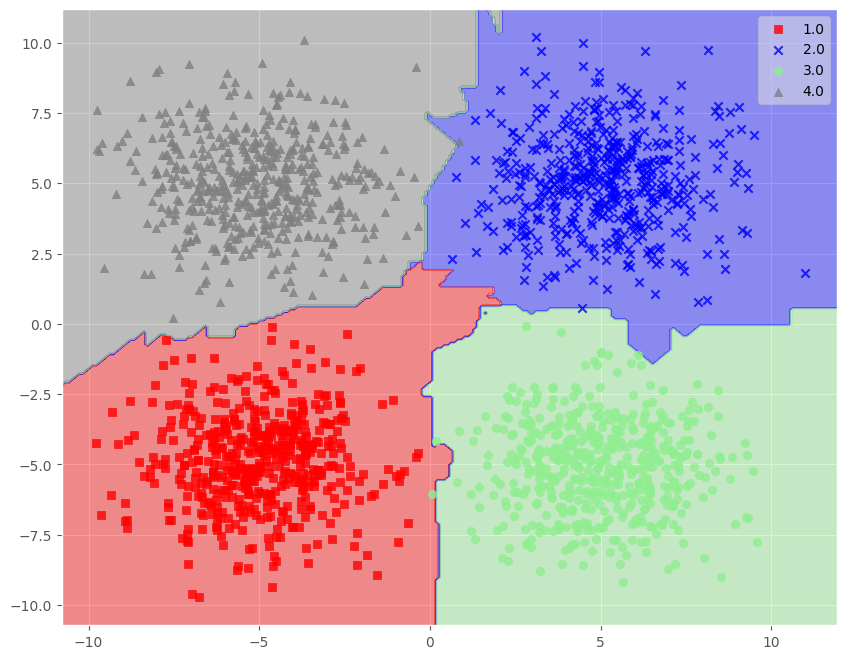

In [64]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [65]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


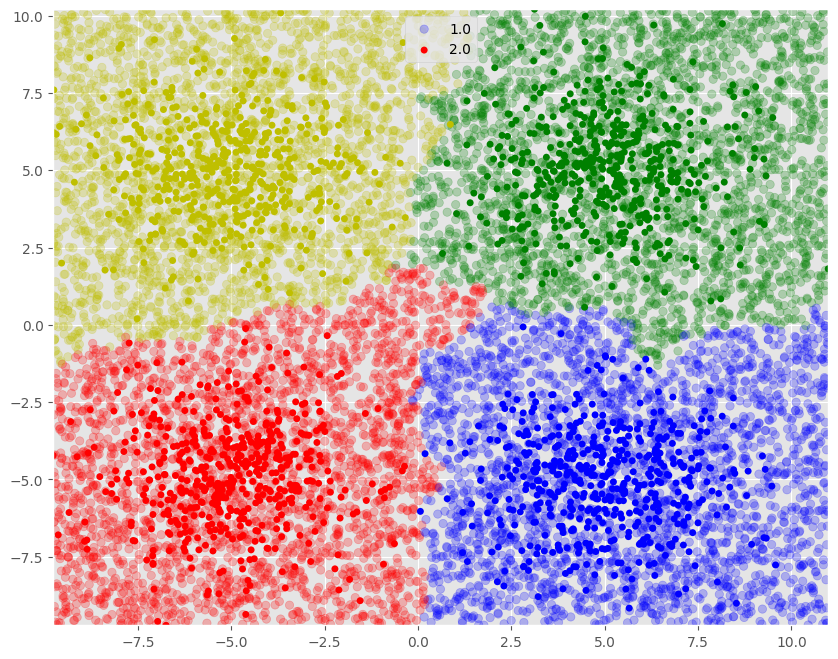

In [66]:
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned OFF


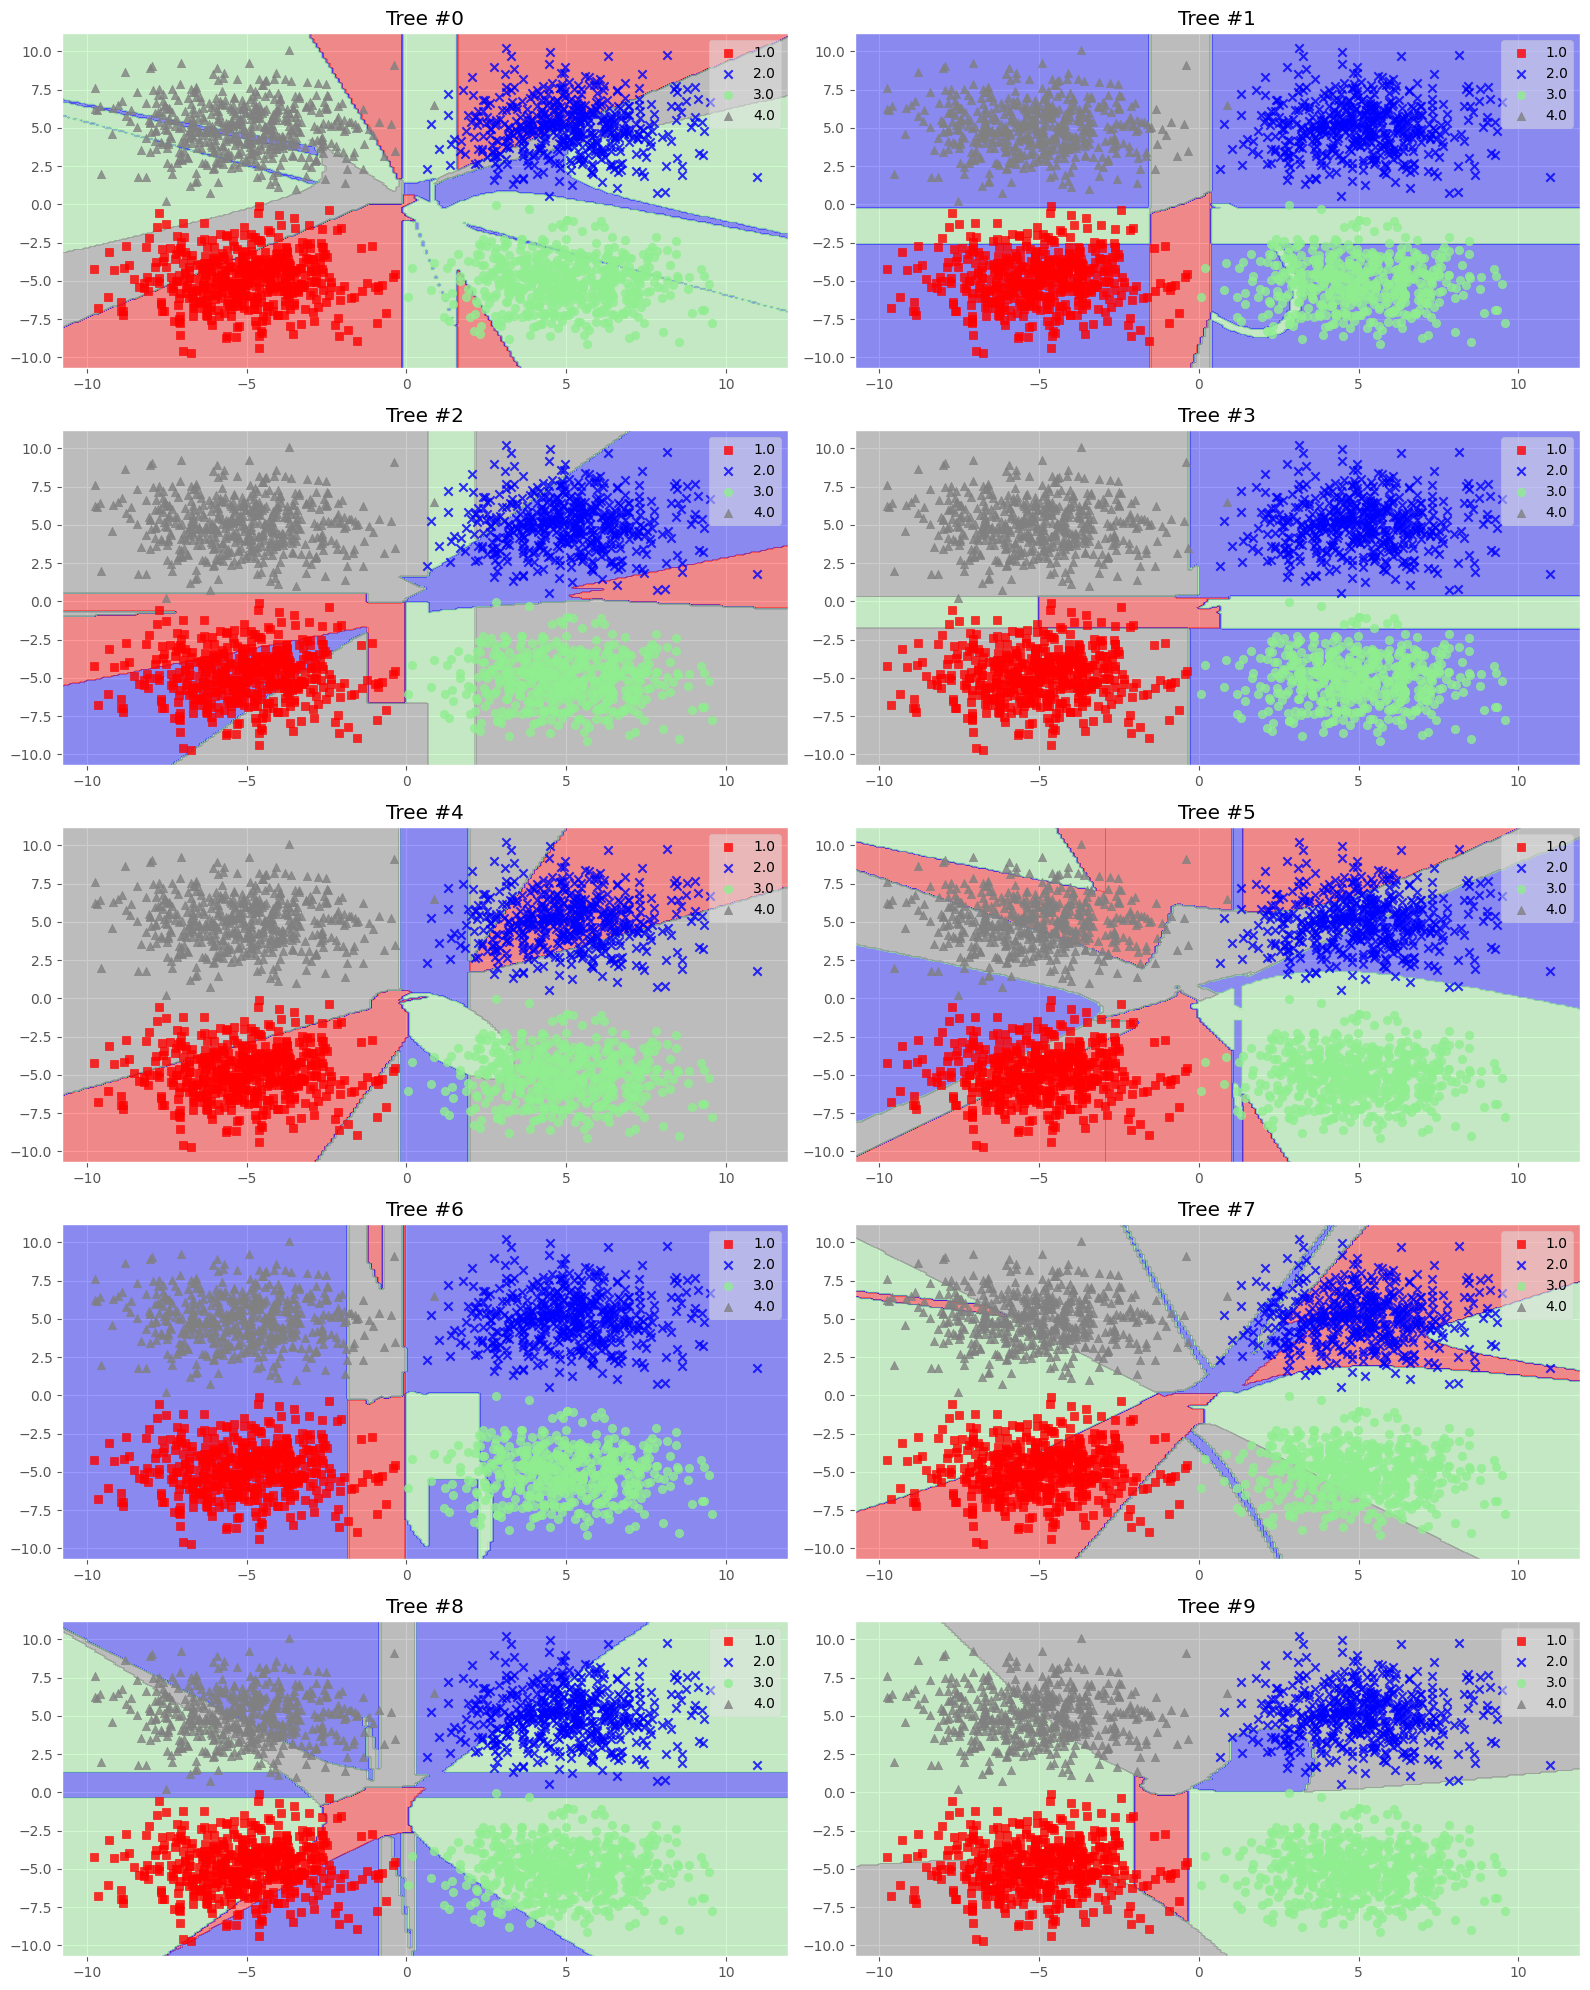

In [67]:
%pdb off
ntrees=rfc.ntrees
nrows=ntrees//2 
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout()

#### What Can You conclude

In [ ]:
# Different trees from the random forest have learned different separating lines from the training data. 
# This is the reason why the random forest is able to generalize well on the testing data. The random forest is able to generalize well on the testing data 
# because it averages the predictions of the individual trees. The individual trees are able to learn different separating lines from the training data. 


## Lets Run on Nonlinear Data, The Spherical Examples...

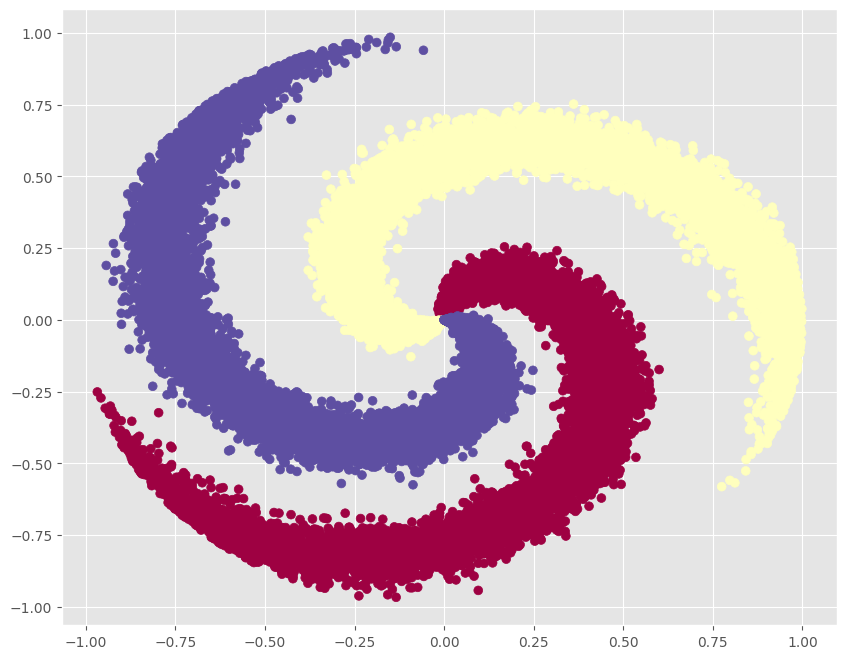

In [68]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [70]:
print (X.shape, Y.shape)

(30000, 2) (30000,)


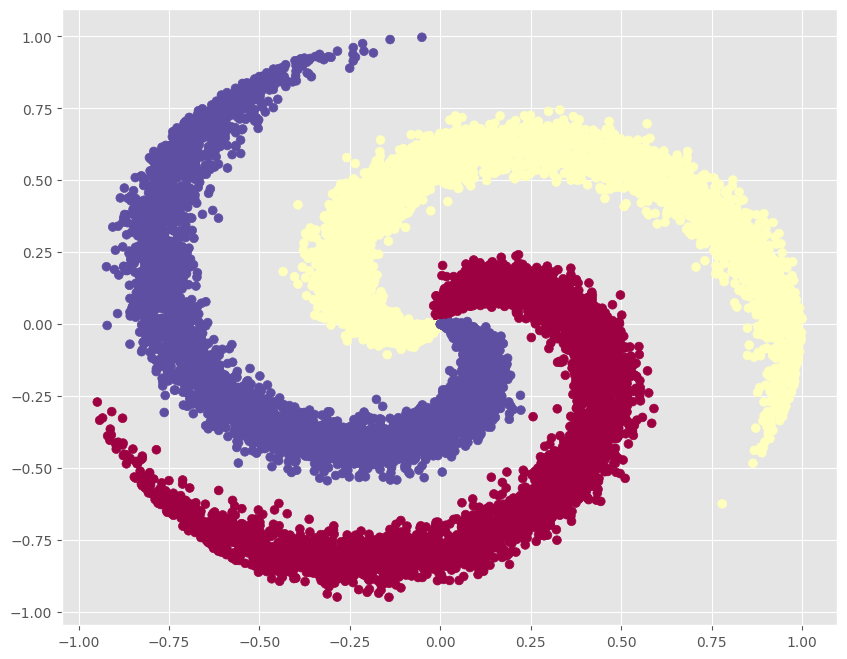

In [69]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [71]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [72]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted   0.0    1.0    2.0    All
Actual                              
0          9414     29    557  10000
1             4   9946     50  10000
2            25     49   9926  10000
All        9443  10024  10533  30000

In [73]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted   0.0   1.0   2.0    All
Actual                            
0          4714     8   278   5000
1             1  4972    27   5000
2            16    22  4962   5000
All        4731  5002  5267  15000

In [74]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


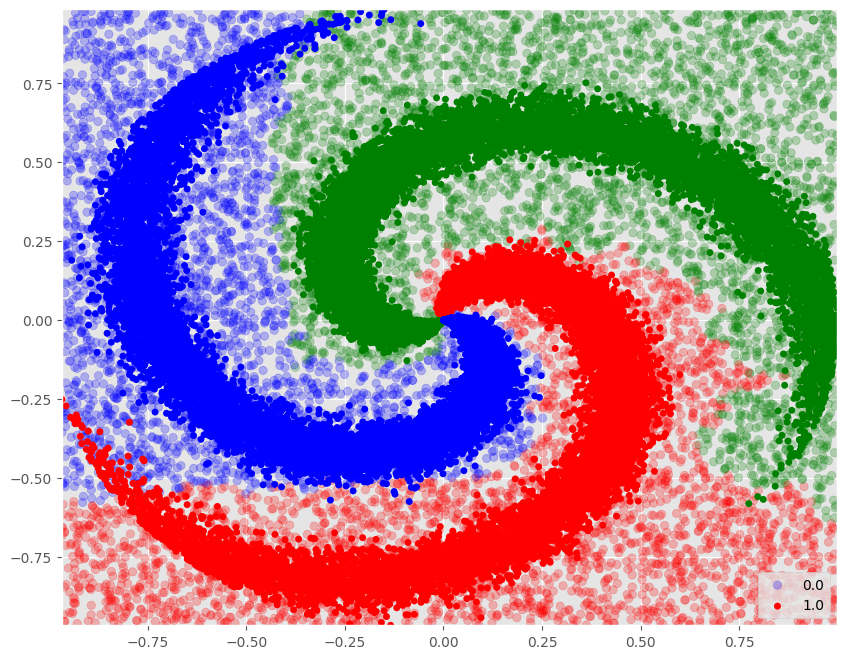

In [75]:
t.plot_points_range(rfc,X,Y)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


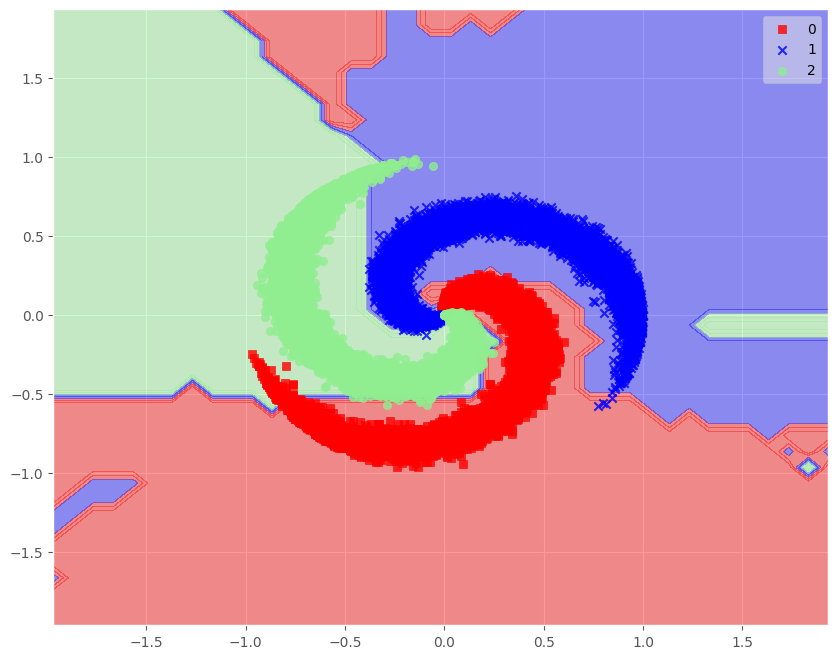

In [76]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

###Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned OFF


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

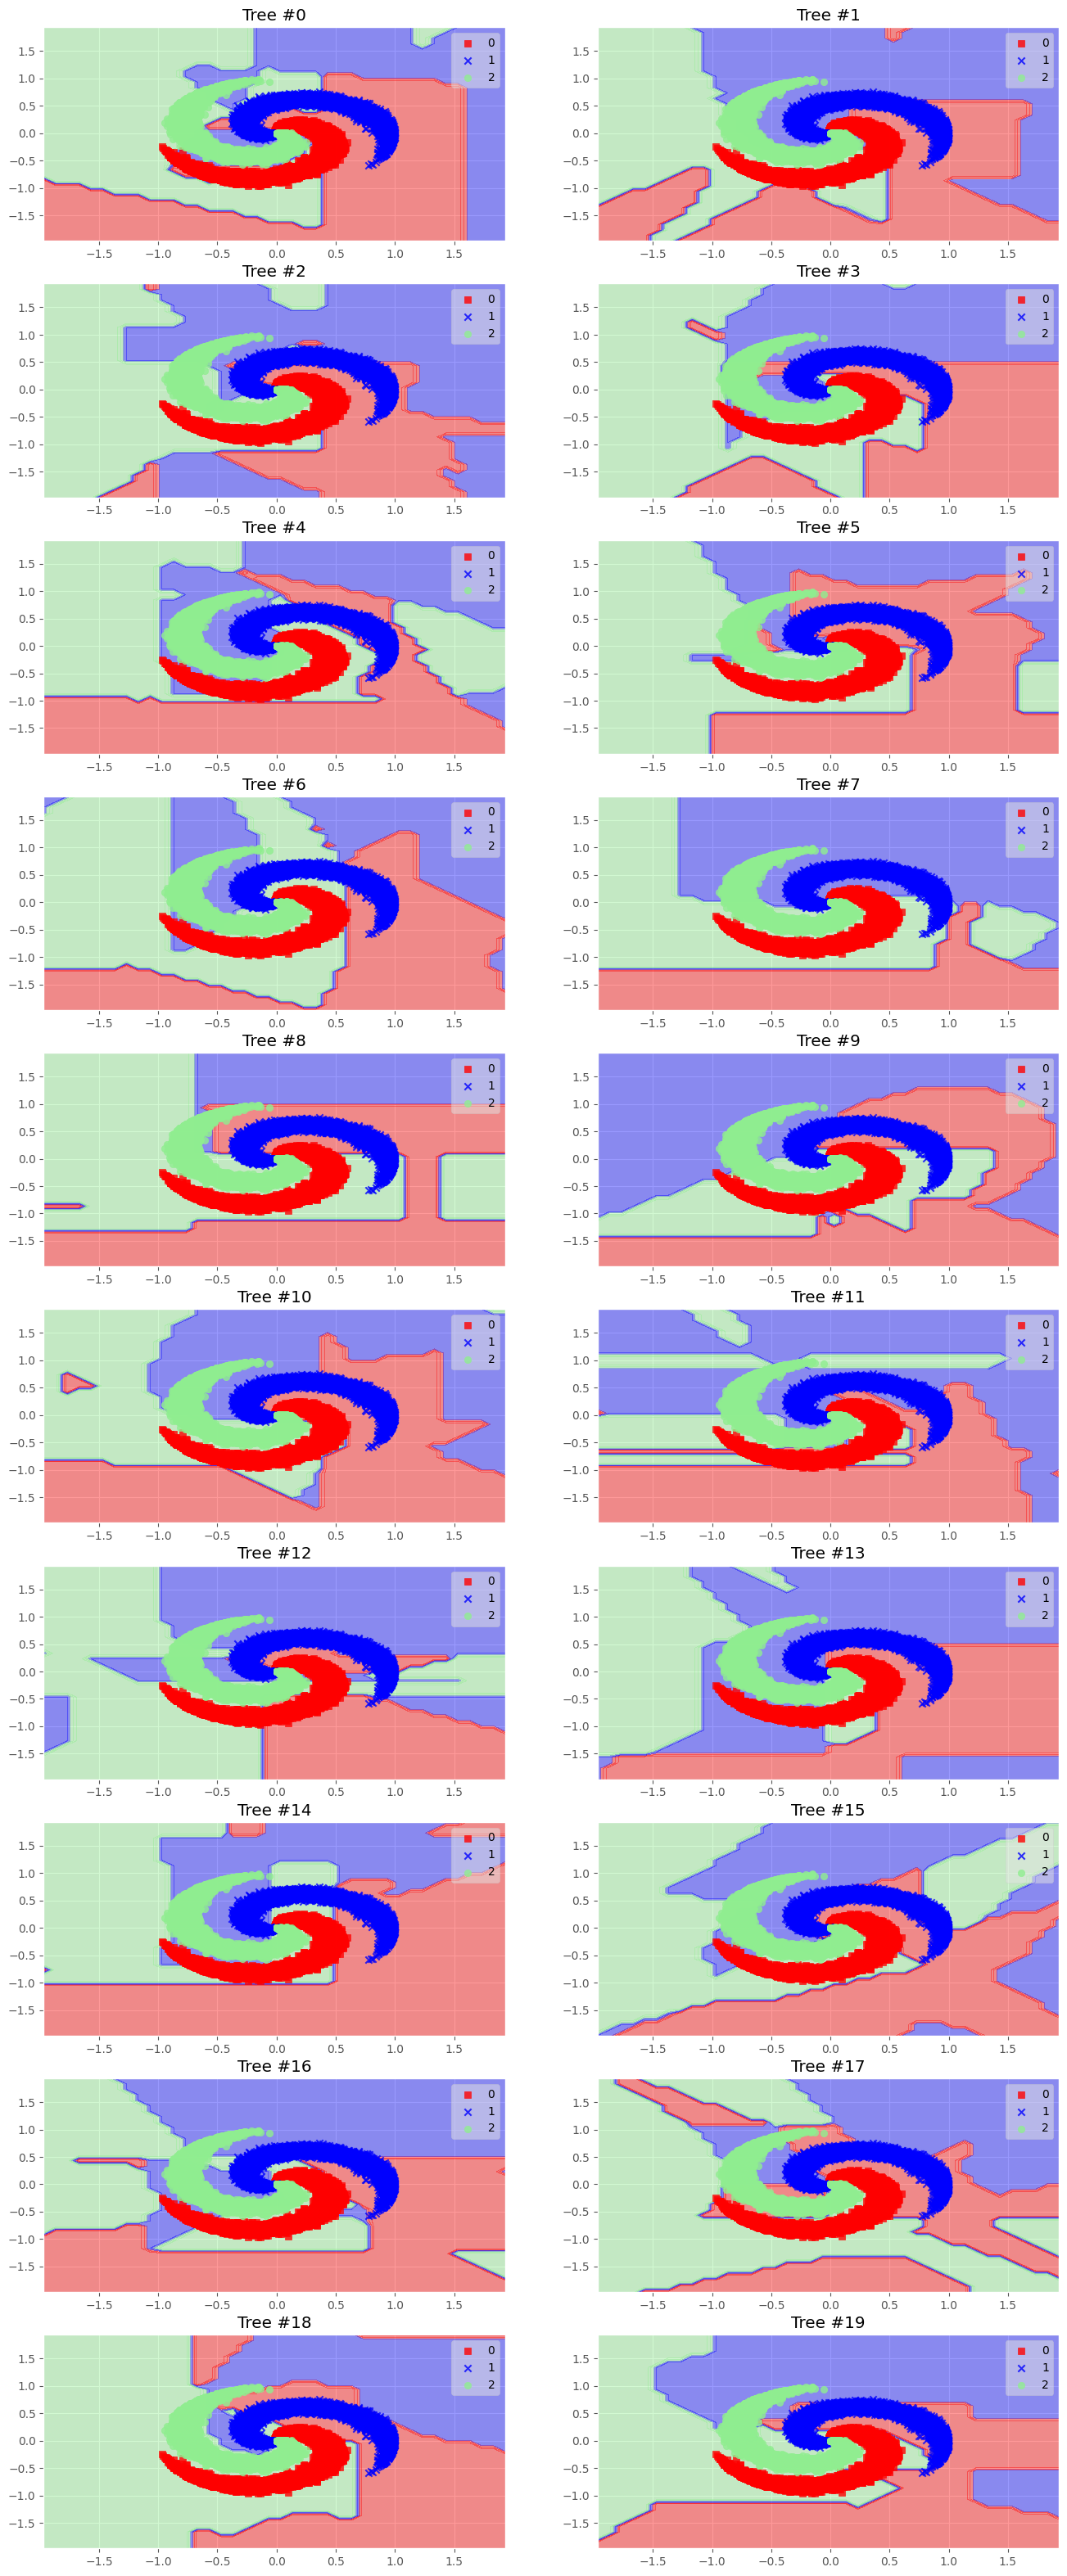

In [77]:
%pdb off
ntrees=rfc.ntrees
nrows=ntrees//2 
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [79]:

ntrees = range(1,20)
best_trees = 0
best_acc = 0.0

for n in ntrees:
    rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=n)
    rfc.train(X,Y)
    Ypt=rfc.predict(Xtest)
    acc = np.sum(Ytest.flatten() ==  np.array(Ypt.astype(np.uint8))) / float(Ytest.shape[0]) 
    print ("No. of Trees :",n, "Accuracy :", acc, "%")

    if acc > best_acc:
        best_acc = acc
        best_trees = n



print(f"\nBest Accuracy: {best_acc} with {best_trees} number of trees!")



No. of Trees : 1 Accuracy : 0.992 %
No. of Trees : 2 Accuracy : 0.9744 %
No. of Trees : 3 Accuracy : 0.9844666666666667 %
No. of Trees : 4 Accuracy : 0.9800666666666666 %
No. of Trees : 5 Accuracy : 0.9626 %
No. of Trees : 6 Accuracy : 0.9642 %
No. of Trees : 7 Accuracy : 0.9876 %
No. of Trees : 8 Accuracy : 0.9718666666666667 %
No. of Trees : 9 Accuracy : 0.988 %
No. of Trees : 10 Accuracy : 0.9729333333333333 %
No. of Trees : 11 Accuracy : 0.9792666666666666 %
No. of Trees : 12 Accuracy : 0.9827333333333333 %
No. of Trees : 13 Accuracy : 0.962 %
No. of Trees : 14 Accuracy : 0.9607333333333333 %
No. of Trees : 15 Accuracy : 0.9718666666666667 %
No. of Trees : 16 Accuracy : 0.9676 %
No. of Trees : 17 Accuracy : 0.9800666666666666 %
No. of Trees : 18 Accuracy : 0.9736666666666667 %
No. of Trees : 19 Accuracy : 0.9796 %

Best Accuracy: 0.992 with 1 number of trees!
